In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Lendo imagem

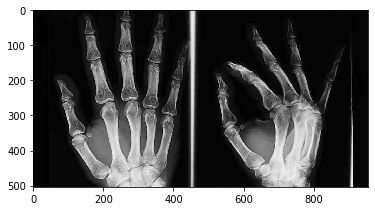

In [8]:
img = cv2.imread('raios-x.jpg',0)
plt.imshow(img, 'gray');

In [108]:
tamImg = img.shape
print(tamImg)

(504, 955)


### Filtros

In [134]:
# simple averaging filter without scaling parameter
mean_filter = np.ones(tamImg)

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']

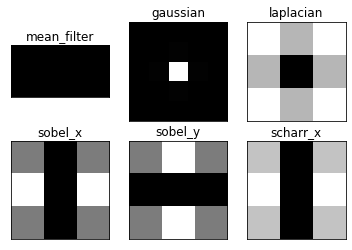

In [131]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

### Testando pra ver o filtro da média

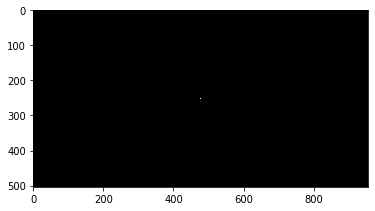

In [111]:
plt.imshow(mag_spectrum[0], 'gray');

In [115]:
mag_spectrum[0].shape

(504, 955)

### Aplicando FFT e FFTShift na imagem e voltando

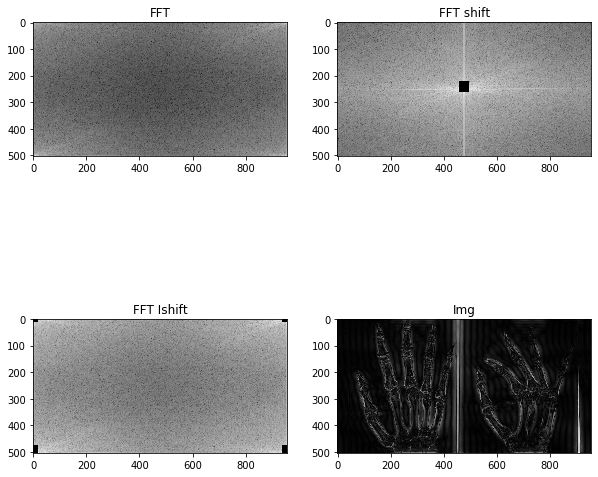

In [151]:
fftImg = np.fft.fft2(img)
# fftImgShift = np.fft.fftshift(fftImg)
fftImgIshift = np.fft.ifftshift(fftImgShift)
ImgVotou = np.fft.ifft2(fftImgIshift)

plt.figure(figsize=[10,10])
plt.subplot(221), plt.imshow(np.log(np.abs(fftImg)+1), 'gray'), plt.title('FFT')
plt.subplot(222), plt.imshow(np.log(np.abs(fftImgShift)+1), 'gray'),plt.title('FFT shift')
plt.subplot(223), plt.imshow(np.log(np.abs(fftImgIshift)+1), 'gray'), plt.title('FFT Ishift')
plt.subplot(224), plt.imshow((np.abs(ImgVotou)), 'gray'),plt.title('Img')

plt.show()

### Aplicando filtro média na FFTimagem 

In [140]:
# spectrumImg = np.log(np.abs(fftImgShift)+1)

In [146]:
tamImg

(504, 955)

In [150]:
fftImgShift[222:262 , 457:497] = 0.0

In [152]:
# respMedia = cv2.bitwise_and(fftImgShift, mag_spectrum[0])

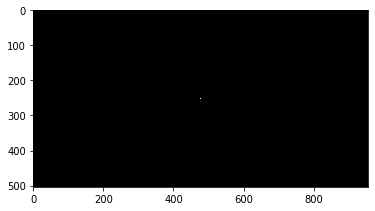

In [136]:
plt.imshow(respMedia, 'gray');

In [137]:
fftImgDesshift = np.fft.ifftshift(respMedia)
ImgMedia = np.fft.ifft2(fftImgDesshift)

In [106]:
print(img.mean())

50.68072176514585


In [105]:
print(fftImgDesshift)

[[8.00390638e+000 7.82391874e-308 4.45034177e-308 ... 4.59084834e-308
  4.45034177e-308 7.82391874e-308]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


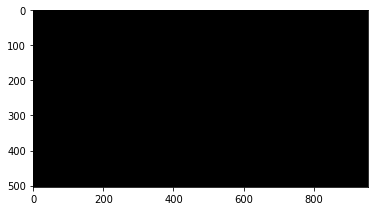

In [138]:
plt.imshow(np.log(np.abs(fftImgDesshift)+1), 'gray');

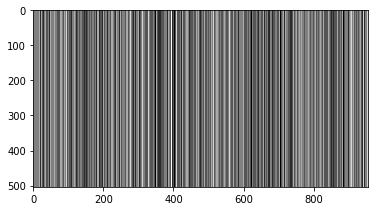

In [144]:
plt.imshow((np.abs(ImgMedia)), 'gray');